<a href="https://colab.research.google.com/github/abhi0928/git-github/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omi0928","key":"490b08a841e8c4ee069791c3c2ed65e2"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer

 94% 69.0M/73.2M [00:01<00:00, 33.5MB/s]
100% 73.2M/73.2M [00:01<00:00, 40.0MB/s]
 98% 48.0M/48.8M [00:01<00:00, 27.3MB/s]
100% 48.8M/48.8M [00:01<00:00, 33.3MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 228MB/s]


In [4]:
# Importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
sns.set_context('talk')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print(f'shape of training data is {train.shape}')
print(f'shape of testing data is {test.shape}')

shape of training data is (42000, 785)
shape of testing data is (28000, 784)


In [0]:
# set target variable for training set
label = train['label']

# drop label column from train dataset
features = train.drop('label', axis = 1)

# free some space 
del train

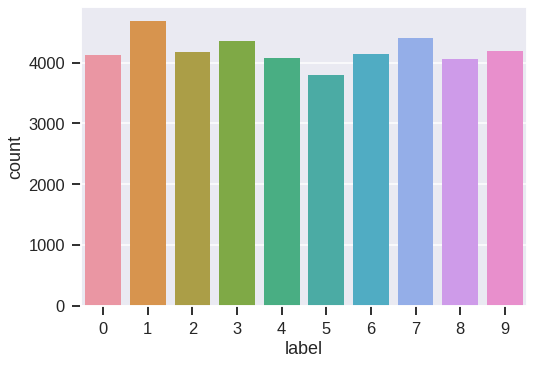

In [9]:
sns.countplot(label)

## Checking for null and missing values

In [10]:
features.isna().sum()[features.isna().sum() != 0]

Series([], dtype: int64)

In [0]:
# there is no null or missing value in train dataset

In [12]:
test.isna().sum()[test.isna().sum() != 0]

Series([], dtype: int64)

In [0]:
# there is no null or missing value in test dataset

## Normalize the data

In [0]:
'''
We perform a grayscale normalization to reduce the effect of illumination's differences.
Moreover the CNN converg faster on [0..1] data than on [0..255].
'''
features = features / 255.0
test = test / 255.0

## Reshape

In [0]:
# reshape image in 3 dimensions(height = 28px, width = 28px, canal = 1)
features = features.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

## Label Encoding

In [0]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
label = to_categorical(label, num_classes = 10)

## Splitting training and validation data

In [0]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size = 0.3, random_state = 42)

label-->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
	[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


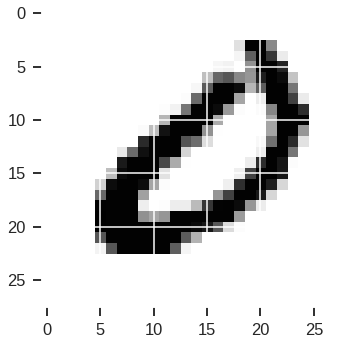

In [18]:
# display some data 
idx = np.random.choice(29400)
plt.imshow(X_train[idx][:, :, 0])
print(f'label-->[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]\n\t{y_train[idx]}')

# Build the model

In [19]:
model = Sequential()

# first Convolutional layer
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu'))
# Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout layer
model.add(Dropout(rate = 0.25))

# Second Convolutional layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
# Pooling layer
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
# Dropout layer
model.add(Dropout(rate = 0.25))

# Flatten layer
model.add(Flatten())

# input layer and first hidden layer
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
# Output layer
model.add(Dense(units = 10, activation = 'softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [0]:
# Set the optimizer 
optimizer = RMSprop(lr = 0.001, epsilon = 1e-08, rho = 0.9, decay = 0.0)

In [22]:
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# Set a learning rate annelear
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', 
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

In [0]:
epoch = 30
batch_size = 86

## Data Augmentation

In [0]:
datagen = ImageDataGenerator(featurewise_center = False, 
                             samplewise_center = False, 
                             featurewise_std_normalization = False, 
                             samplewise_std_normalization = False, 
                             zca_whitening = False,
                             rotation_range = 10,
                             zoom_range = 0.1,
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             horizontal_flip = False,
                             vertical_flip = False)

datagen.fit(X_train)

## Fit the model

In [28]:
train_generator = datagen.flow(X_train, y_train, batch_size = batch_size)

history = model.fit_generator(train_generator, epochs = epoch, 
                              validation_data = (X_val, y_val), verbose = 1, 
                              steps_per_epoch = X_train.shape[0] // batch_size, 
                              callbacks = [learning_rate_reduction])

Epoch 1/30
341/341 [==============================] - 14s 41ms/step - loss: 0.0443 - acc: 0.9866 - val_loss: 0.0238 - val_acc: 0.9931
Epoch 2/30
341/341 [==============================] - 14s 41ms/step - loss: 0.0405 - acc: 0.9874 - val_loss: 0.0202 - val_acc: 0.9933
Epoch 3/30
341/341 [==============================] - 13s 40ms/step - loss: 0.0442 - acc: 0.9866 - val_loss: 0.0211 - val_acc: 0.9941
Epoch 4/30
341/341 [==============================] - 13s 39ms/step - loss: 0.0408 - acc: 0.9886 - val_loss: 0.0245 - val_acc: 0.9931
Epoch 5/30
341/341 [==============================] - 14s 40ms/step - loss: 0.0419 - acc: 0.9875 - val_loss: 0.0248 - val_acc: 0.9931
Epoch 6/30
341/341 [==============================] - 13s 40ms/step - loss: 0.0402 - acc: 0.9881 - val_loss: 0.0220 - val_acc: 0.9941

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 7/30
341/341 [==============================] - 13s 39ms/step - loss: 0.0385 - acc: 0.9890 - val_loss: 0.0184

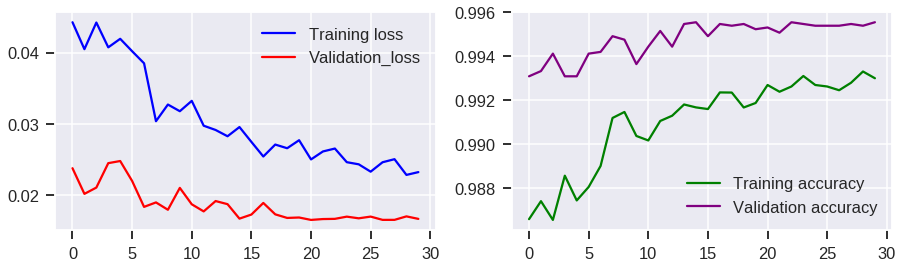

In [39]:
# plot the loss and accuracies curve for training and validation
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].plot(history.history['loss'], color = 'b', label = 'Training loss')
ax[0].plot(history.history['val_loss'], color = 'r', label = 'Validation_loss', axes = ax[0])
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['acc'], color = 'g', label = 'Training accuracy')
ax[1].plot(history.history['val_acc'], color = 'purple', label = 'Validation accuracy', axes = ax[1])
legend = ax[1].legend(loc = 'best', shadow = True)

In [46]:
# predict the values from validation dataset
y_pred = model.predict(X_val)

# Convert prediction classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert predicions observations to one hot vectors
y_true = np.argmax(y_val, axis = 1)

cm = confusion_matrix(y_true, y_pred_classes)
cm

array([[1198,    0,    0,    0,    0,    1,    0,    0,    1,    0],
       [   0, 1383,    1,    0,    1,    0,    1,    3,    0,    0],
       [   0,    0, 1289,    1,    0,    0,    0,    2,    2,    0],
       [   0,    0,    0, 1353,    0,    0,    0,    1,    1,    0],
       [   0,    1,    0,    0, 1214,    0,    0,    1,    0,    6],
       [   0,    0,    0,    3,    0, 1079,    2,    0,    1,    0],
       [   1,    1,    0,    0,    3,    3, 1248,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0, 1355,    0,    3],
       [   0,    0,    3,    1,    0,    0,    1,    0, 1202,    2],
       [   2,    0,    1,    0,    1,    0,    0,    2,    2, 1223]])